In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df = pd.read_csv("data/redteam.txt")

G = nx.from_pandas_edgelist(df, 'src', 'dst', ['user@domain', 'time'])

We are going to play with some network analysis features that may provide us with some general knowledge about our dataset. First, lets just take a look at our dataset. We will just have fun pulling nodes ofrom the network.

In [2]:
list(G.edges(data=True))[16]

('C17693', 'C2519', {'user@domain': 'U342@DOM1', 'time': 2301831})

In [3]:
list(G.edges(data=True))[30]

('C17693', 'C1014', {'user@domain': 'U995@DOM1', 'time': 2303870})

### Finding the most important node i.e computer in this network

Network Science offers us many different metrics to measure the importance of a node in a network as we saw in the first part of the tutorial. Note that there is no "correct" way of calculating the most important node in a network, every metric has a different meaning.

First, let's measure the importance of a node in a network by looking at the number of neighbors it has, that is, the number of nodes it is connected to. For example, an influential account on Twitter, where the follower-followee relationship forms the network, is an account which has a high number of followers. This measure of importance is called degree centrality.

Using this measure, let's extract the top ten important computers from the network.

In [4]:
deg_cen = nx.degree_centrality(G)

In [5]:
sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:10]

[('C17693', 0.9736842105263157),
 ('C19932', 0.02631578947368421),
 ('C457', 0.009868421052631578),
 ('C22409', 0.009868421052631578),
 ('C529', 0.006578947368421052),
 ('C754', 0.006578947368421052),
 ('C586', 0.006578947368421052),
 ('C467', 0.006578947368421052),
 ('C625', 0.006578947368421052),
 ('C1003', 0.003289473684210526)]

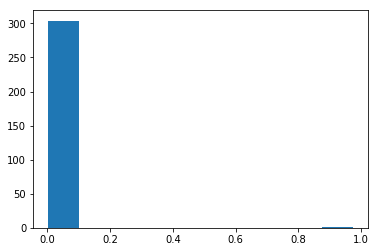

In [97]:
# Plot a histogram of degree centrality
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

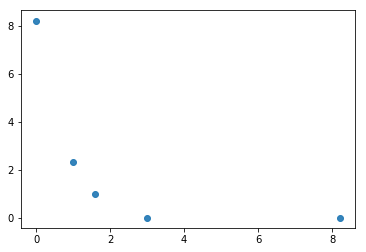

In [98]:
d = {}
for i, j in dict(nx.degree(G)).items():
    if j in d:
        d[j] += 1
    else:
        d[j] = 1
x = np.log2(list((d.keys())))
y = np.log2(list(d.values()))
plt.scatter(x, y, alpha=0.9)
plt.show()

Let's do this for betweeness centrality and check if this makes any difference. Betweeness centrality is a measure of centrality in a graph based on the number of shortest paths. For every pair of nodes in a connected graph, there exists at least one shortest path between the nodes such that either the number of edges that the path passess through is minimized.

In [99]:
# First check unweighted, just the structure

sorted(nx.betweenness_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10]

[('C17693', 0.9859012217011176),
 ('C19932', 0.02394186787099774),
 ('C457', 0.011728475479126888),
 ('C529', 0.007411267442533744),
 ('C586', 0.007411267442533744),
 ('C625', 0.007411267442533744),
 ('C754', 0.004243022986509202),
 ('C22409', 0.0021857448902785066),
 ('C467', 7.418505008395576e-05),
 ('C1003', 0.0)]

### PageRank
The billion dollar algorithm, PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

In [36]:
# by default weight attribute in pagerank is weight, so we use weight=None to find the unweighted results
sorted(nx.pagerank_numpy(G, weight=None).items(), key=lambda x:x[1], reverse=True)[0:10]

[('C17693', 0.4425539799142401),
 ('C19932', 0.010639292720342084),
 ('C22409', 0.0040508567406953265),
 ('C457', 0.004040818450878313),
 ('C1493', 0.003278688524590145),
 ('C18025', 0.003278688524590144),
 ('C754', 0.002910393599341963),
 ('C529', 0.0028930757076813043),
 ('C586', 0.0028930757076813043),
 ('C625', 0.0028930757076813043)]

## HITS algorithm

Hyperlink-Induced Topic Search (HITS) is a link analysis algorithm that rates web pages. The idea is that hubs and authorities stemmed from a particular insight into the creation of web pages when the Internet was originally forming; that is, certain wbe pages, known as hubs serve as large directories that were not actually auhtoritative in the information that they held, but they were used as compilations of broad catalog of information that led users direct to other authoritative pages. In other words, a good hub represented a page that pointed to many other pages, and a good authority represted a page that was linked by many different hubs.

(array([304.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([8.29601990e-21, 4.89786492e-02, 9.79572985e-02, 1.46935948e-01,
        1.95914597e-01, 2.44893246e-01, 2.93871895e-01, 3.42850545e-01,
        3.91829194e-01, 4.40807843e-01, 4.89786492e-01]),
 <a list of 10 Patch objects>)

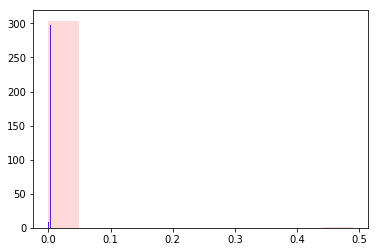

In [117]:
hub, authority = nx.hits(G)
hub_values = hub.values()
auth_values = authority.values()
plt.hist(hub_values, 10, facecolor='blue', alpha=0.85)
plt.hist(auth_values, 10, facecolor='red', alpha=0.15)

Let's look at the evolution of degree centrality over time. This is just another method to evaluate our data. We can see the change in degree centrality. We can assume our node with a higher degree centrality will pop up more often overtime and we will see various jumps in this data.

In [118]:
evol = nx.degree_centrality(G)
def g_deg_cent(node):
    for key, value in evol.items():
        if key == node:
            return value

In [119]:
df['src_cent'] = df['src'].apply(g_deg_cent)
df['dst_cent'] = df['dst'].apply(g_deg_cent)

Text(0, 0.5, 'Degree Centrality')

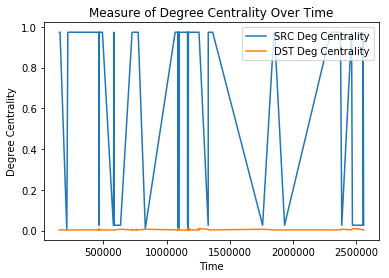

In [120]:
src = df['src_cent']
dst = df['dst_cent']
tm = df['time']
plt.plot(tm, src)
plt.plot(tm, dst)
plt.legend(['SRC Deg Centrality', 'DST Deg Centrality'], loc='upper right')
plt.title('Measure of Degree Centrality Over Time')
plt.xlabel('Time')
plt.ylabel('Degree Centrality')

### Exercise 4

Build your own time-series graph measuring the pagerank or another measurement of nodes over time

These slides/demos are based on concepts from: https://github.com/ericmjl/Network-Analysis-Made-Simple.